In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Sampling

In [3]:
feet = [0, 6000, 15000, 
        20000, 35000, 32000, 
        31000, 31000, 27000, 
        12000, 3500, 1200, 0]
minutes = np.arange(0,130,10)

In [4]:
print(len(minutes))
print(len(feet))

13
13


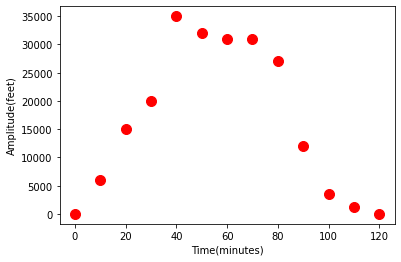

In [5]:
plt.scatter(minutes, feet, c='red', s=100)
plt.xlabel('Time(minutes)')
plt.ylabel('Amplitude(feet)')
plt.show()

In [6]:
print(feet[4])
print(feet[8])

35000
27000


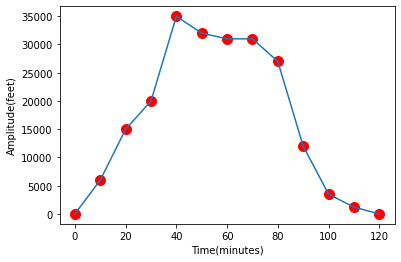

In [7]:
plt.scatter(minutes, feet, c='red', s=100)
plt.plot(minutes, feet)
plt.xlabel('Time(minutes)')
plt.ylabel('Amplitude(feet)')
plt.show()

In [8]:
import os

import librosa
import librosa.display
import IPython.display

In [11]:
# path 정보 확인
print(os.getcwd())

target_path = "d:\GH\Audio\dataset\origin\origin_snoring"
print(target_path)

d:\GH\Audio\DSP
d:\GH\Audio\dataset\origin\origin_snoring


In [14]:
filename = os.path.join(target_path, 'snoring_1.wav')
y, sr = librosa.load(filename, sr=8000, mono=True)

print(y, sr)

[ 0.00034156  0.0029323   0.00666607 ...  0.20939346  0.0919487
 -0.00145129] 8000


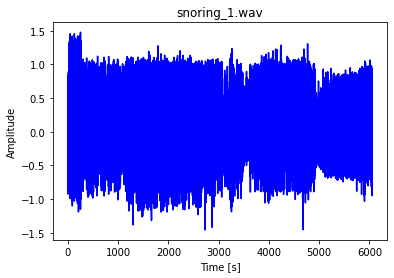

In [16]:
time = np.linspace(0, len(y)/sr, len(y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('snoring_1.wav') # 제목
plt.show()

In [22]:
# sampling rate = 1sec
print(len(y))
total_sec = int(len(y)) / sr
print(f"Total time of this audio: {total_sec} seconds")

48432200
Total time of this audio: 6054.025 seconds


# 1초씩 잘라서 figure

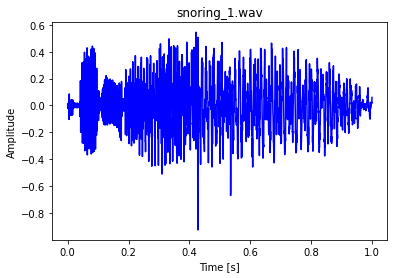

In [23]:
second = y[:sr]
second_time = np.linspace(0, len(second)/sr, len(second)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(second_time, second, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('snoring_1.wav') # 제목
plt.show()

In [28]:
fft = np.fft.fft(second)
print("fft shape: ", fft.shape)

fft shape:  (8000,)


In [29]:
spectrum = np.abs(fft)
print("spectrum shape : ", spectrum.shape)

spectrum shape :  (8000,)


In [30]:
f = np.linspace(0, sr, len(spectrum))
print("f shape : ", f.shape)

f shape :  (8000,)


In [33]:
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
print("left_spectrum shape : ", left_spectrum.shape)
print("left_f shape : ", left_f.shape)

left_spectrum shape :  (4000,)
left_f shape :  (4000,)


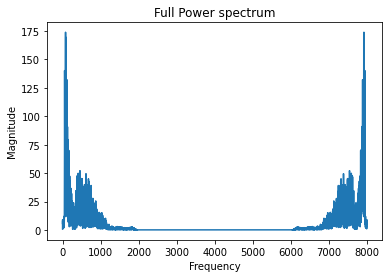

In [39]:
fig, ax1 = plt.subplots() # plot
ax1.plot(f, spectrum)
ax1.set_ylabel("Magnitude") # y 축
ax1.set_xlabel("Frequency") # x 축
plt.title('Full Power spectrum') # 제목
plt.show()

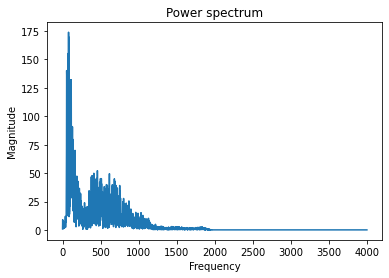

In [40]:
fig, ax1 = plt.subplots() # plot
ax1.plot(left_f, left_spectrum)
ax1.set_ylabel("Magnitude") # y 축
ax1.set_xlabel("Frequency") # x 축
plt.title('Power spectrum') # 제목
plt.show()

(513, 16) 16 (-0.3331954+0j)


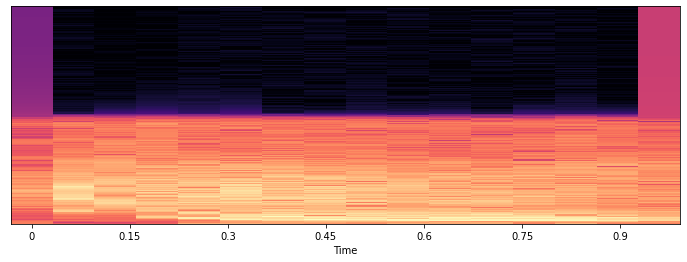

In [64]:
S = librosa.core.stft(second, n_fft=1024, hop_length=512, win_length=1024)
print(S.shape, len(S[0]), S[0][0])

log_S = librosa.power_to_db(S, ref=np.max) #소리의 단위를 db로 바꿈 

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, hop_length=512, x_axis='time')

In [50]:
D = np.abs(S)**2    # phase 에 대한 정보를 날린다.
print(D.shape, len(D[0]), D[0][0])

(513, 16) 16 0.111019164


In [53]:
# mel spectrogram (512 --> 40)
mel_basis = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=40)
mel_S = np.dot(mel_basis, D)
mel_S.shape

(40, 16)

In [57]:
log_mel_S = librosa.power_to_db(mel_S)
log_mel_S.shape

(40, 16)

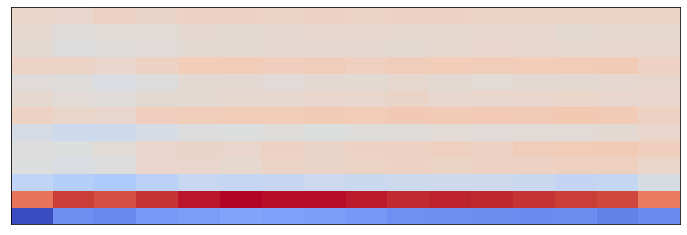

In [59]:
# mfcc (DCT)
mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=13)
mfcc = mfcc.astype(np.float32)    # to save the memory (64 to 32 bits)

plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc)

(13, 16)


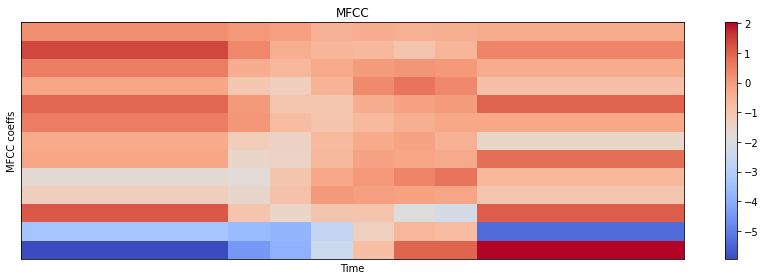

In [60]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [61]:
import IPython.display as ipd

ipd.display(ipd.Audio(data=second, rate=sr))

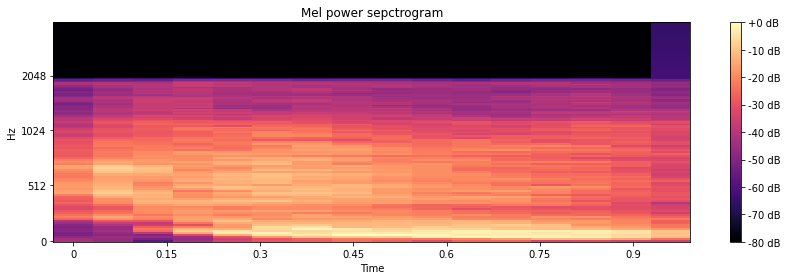

In [56]:
S = librosa.feature.melspectrogram(y=second, sr=sr, n_mels = 128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

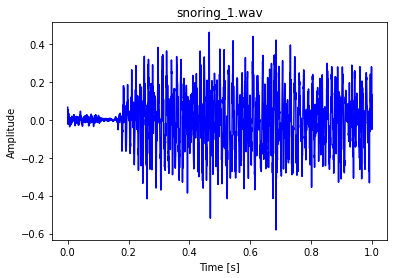

In [62]:
snore_2 = y[sr:(sr*2)]
second_time_2 = np.linspace(0, len(snore_2)/sr, len(snore_2)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(second_time_2, snore_2, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('snoring_1.wav') # 제목
plt.show()